#Problem 2

In this problem we solve following ODEs using Heun's, 4th order Runge-Kutta and Adams method:

\begin{equation}
y' = y \cos{(x + y)}, y(0) = 1 \\
y' = \sin{(xy)}\cos{(x+y)}, y(0) = 1
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f1(x, y):
  return y*np.cos(x + y)

def f2(x, y):
  return np.sin(x*y)*np.cos(x + y)

Heun's method predicts the next value as:

\begin{equation}
  \tilde{y}_{n+1} = y_n + hf(x_n, y_n)
\end{equation}

and solves the next values as:

\begin{equation}
  y_{n+1} = y_n + \frac{h}{2} (f(x_n, y_n) + f(x_{n+1} + \tilde{y}_{n+1}))
\end{equation}

In [ ]:
def heuns(f, n, x0, x1, y0):
  y = np.zeros(n + 1)
  y[0] = y0
  x = np.linspace(x0, x1, n + 1)
  h = (x1 - x0)/n
  for i in range(n):
    y_predict = y[i] + h*f(x[i], y[i])
    y[i+1] = y[i] + h*(f(x[i], y[i]) + f(x[i+1], y_predict))/2
  return x, y

4th order Runge-Kutta method calculates the solution as:

\begin{equation}
  y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6
\end{equation}

where:

\begin{equation}
  k_1 = hf(x_n, y_n) \\
  k_2 = hf(x_n + h/2, y_n + k_1/2) \\
  k_3 = hf(x_n + h/2, y_n + k_2/2) \\
  k_4 = hf(x_n + h, y_n + k_3) \\
\end{equation}

In [ ]:
def rk4(f, n, x0, x1, y0):
  y = np.zeros(n + 1)
  y[0] = y0
  x = np.linspace(x0, x1, n + 1)
  h = (x1 - x0)/n
  for i in range(n):
    k1 = h*f(x[i], y[i])
    k2 = h*f(x[i] + h/2, y[i] + k1/2)
    k3 = h*f(x[i] + h/2, y[i] + k2/2)
    k4 = h*f(x[i] + h, y[i] + k3)
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
  return x, y

Adam's method computes the differential equation as:

\begin{equation}
  y_{n+1} = y_n + \frac{h}{12}(5f(x_{n+1}, y_{n+1}) + 8f(x_n, y_n) - f(x_{n-1}, y_{n-1}))
\end{equation}

In [ ]:
def adams(f, n, x0, x1, y0):
  y = np.zeros(n + 1)
  y[0] = y0
  x = np.linspace(x0, x1, n + 1)
  h = (x1 - x0)/n

  def rk4_first(f, x, y, h): #RK4 for first two points
    k1 = f(x, y)
    k2 = f(x + h/2, y + h*k1/2)
    k3 = f(x + h/2, y + h*k2/2)
    k4 = f(x + h, y + h*k3)
    return y + h*(k1 + 2*k2 + 2*k3 + k4)/6

  y[1] = rk4_first(f1, x[0], y[0], h)
  y[2] = rk4_first(f, x[1], y[1], h)

  for i in range(2, n):
    y_predict = y[i]
    for j in range(20):
      y_next = y[i] + h*(5*f(x[i+1], y_predict) + 8*f(x[i], y[i]) - f(x[i-1], y[i-1]))/12
      if np.abs(y_next - y_predict) < 1e-8:
        break
    y[i + 1] = y_next
  return x, y

In [ ]:
x_heuns1, y_heuns1 = heuns(f1, 200, 0, 30, 1)
x_rk41, y_rk41 = rk4(f1, 200, 0, 30, 1)
x_adams1, y_adams1 = adams(f1, 200, 0, 30, 1)

x_heuns2, y_heuns2 = heuns(f2, 200, 0, 30, 1)
x_rk42, y_rk42 = rk4(f2, 200, 0, 30, 1)
x_adams2, y_adams2 = adams(f2, 200, 0, 30, 1)

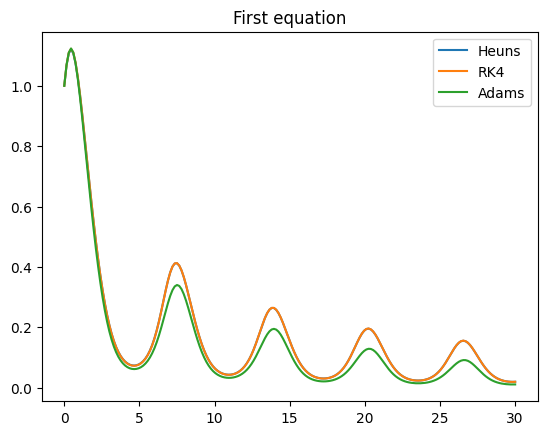

In [ ]:
plt.plot(x_heuns1, y_heuns1, label = 'Heuns')
plt.plot(x_rk41, y_rk41, label = 'RK4')
plt.plot(x_adams1, y_adams1, label = 'Adams')
plt.legend()
plt.title('First equation')
plt.show()

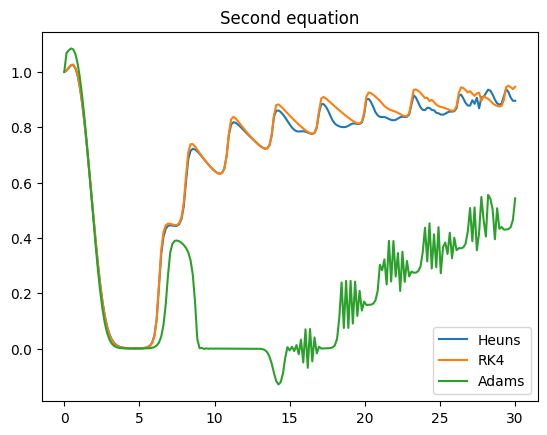

In [ ]:
plt.plot(x_heuns2, y_heuns2, label = 'Heuns')
plt.plot(x_rk42, y_rk42, label = 'RK4')
plt.plot(x_adams2, y_adams2, label = 'Adams')
plt.legend()
plt.title('Second equation')
plt.show()

The graphs of both equations show that Adam's method works for values closer to $x_0$, while Heun's and RK4 methods work quite consistent throughout the whole interval.

#Problem 3

In this problem we try to solve the following equation with Adams-Moulton method with and without correction, and RK4 methods, and compare them to the exact solution:

\begin{equation}
  y' = y + x^2 -2x + \sin{(x)}, y(0) = 0.1
\end{equation}

Adams-Moulton preditction method solves the ODE as:

\begin{equation}
  y_{n+1} = y_n + \frac{h}{24} (55f_n - 59f{n-1} + 37f_{n-2} - 9f_{n-3})
\end{equation}

And the corrector as:

\begin{equation}
  y_{n+1} = y_n + \frac{h}{24} (9f_{n+1} + 19f_n -5f_{n-1} +f_{n-2})
\end{equation}


In [ ]:
def adams_multon_without_correct(f, n, x0, x1, y0):
  y = np.zeros(n+1)
  y[0] = y0
  x = np.linspace(x0, x1, n + 1)
  h = (x1 - x0)/n

  x_temp, y_temp = rk4(f, 3, x0, x0 + 3*h, y0) #RK4 for first points
  y[:4] = y_temp[:4]

  for i in range(3, n):
    y[i+1] = y[i] + h*(55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))/24
  return x, y


In [ ]:
def adams_multon_with_correct(f, n, x0, x1, y0):
  y = np.zeros(n+1)
  y[0] = y0
  x = np.linspace(x0, x1, n + 1)
  h = (x1 - x0)/n

  x_temp, y_temp = rk4(f, 3, x0, x0 + 3*h, y0)
  y[:4] = y_temp[:4]

  for i in range(3, n):
    y_predict = y[i] + h*(55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))/24
    y[i+1] = y[i] + h*(9*f(x[i+1], y_predict) + 19*f(x[i], y[i]) - 5*f(x[i-1], y[i-1]) + f(x[i-2], y[i-2]))/24
  return x, y

In [ ]:
def f3(x, y):
  return y + x**2 - 2*x + np.sin(x)

In [ ]:
def exact_sol(x): #given exact solution
  return 0.6*np.exp(x) - x**2 - 0.5*(np.cos(x) + np.sin(x))

In [ ]:
N = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])

E_rk4 = np.zeros(len(N)); E_AM_with = np.zeros(len(N)); E_AM_without = np.zeros(len(N))

for i in range(len(N)):
  x_rk43, y_rk43 = rk4(f3, N[i], 0, 2, 0.1)
  x_am_without, y_am_without = adams_multon_without_correct(f3, N[i], 0, 2, 0.1)
  x_am_with, y_am_with = adams_multon_with_correct(f3, N[i], 0, 2, 0.1)
  X = np.linspace(0, 2, N[i]+1)
  Y = exact_sol(X)

  E_rk4[i] = np.abs(Y[-1] - y_rk43[-1])
  E_AM_without[i] = np.abs(Y[-1] - y_am_without[-1])
  E_AM_with[i] = np.abs(Y[-1] - y_am_with[-1])

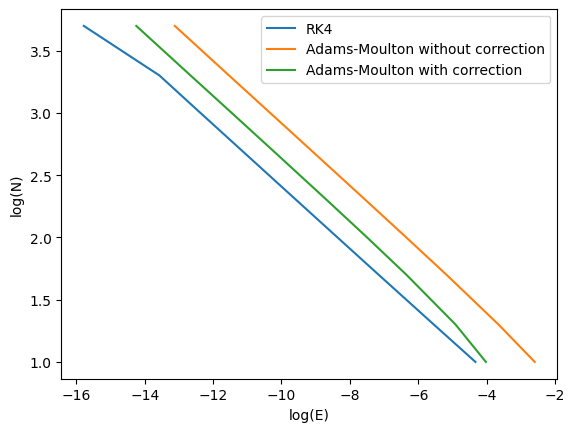

In [ ]:
plt.plot(np.log10(E_rk4), np.log10(N), label = 'RK4')
plt.plot(np.log10(E_AM_without), np.log10(N), label = 'Adams-Moulton without correction')
plt.plot(np.log10(E_AM_with), np.log10(N), label = 'Adams-Moulton with correction')
plt.legend()
plt.xlabel('log(E)')
plt.ylabel('log(N)')
plt.show()

From the graph above we see that RK4 has the leas error for given range of N, while Adams-Moulton without correction is the least accurate.

#Problem 4

In this problem we use 4th order Runge-Kutta method to solve the system of equations:

\begin{equation}
  y' = \sin{(y)} + \cos{(zx)} \\
  z' = e^{-yx} + \frac{\sin{(zx)}}{x}
\end{equation}

with $y(-1) = 2.37$ and $z(-1) = -3.48$.

In [ ]:
def Y(x, y, z):
  return np.sin(y) + np.cos(z*x)

def Z(x, y, z):
  if x == 0: #to avoid division by 0
    x = 0.0000001
  return np.exp(-x*y) + np.sin(x*z)/x

For system of equations, RK4 is similar as for solving a single equation. However, now we solve for both $y_{n+1}$ and $z_{n+1}$ at each step.

In [ ]:
def RK4_system(f, g, x0, x1, y0, z0, h):
  n = int((x1 - x0)/h)
  x = np.linspace(x0, x1, n+1)
  y = np.zeros(n+1); z = np.zeros(n+1)

  y[0] = y0; z[0] = z0

  for i in range(n):
    k1 = h*f(x[i], y[i], z[i])
    l1 = h*g(x[i], y[i], z[i])
    k2 = h*f(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
    l2 = h*g(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
    k3 = h*f(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
    l3 = h*g(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
    k4 = h*f(x[i] + h, y[i] + k3, z[i] + l3)
    l4 = h*g(x[i] + h, y[i] + k3, z[i] + l3)

    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    z[i+1] = z[i] + (l1 + 2*l2 + 2*l3 + l4)/6
  return x, y, z

In [ ]:
x_rk4_sys, y_rk4_sys, z_rk4_sys = RK4_system(Y, Z, -1, 4, 2.37, -3.48, 0.25)

In [ ]:
for i in range(len(x_rk4_sys)):
  print(x_rk4_sys[i], '   ', y_rk4_sys[i], '    ', z_rk4_sys[i])

-1.0     2.37      -3.48
-0.75     2.439910426053102      -1.6466169330354197
-0.5     2.753486041398278      -0.628562562702929
-0.25     3.0576866845120643      0.058066676450050925
0.0     3.297348743253115      0.5123400790306979
0.25     3.483314827300819      0.8519007011023338
0.5     3.6136046595083795      1.1653113862277016
0.75     3.658862573936468      1.4839472279068013
1.0     3.5748537104087843      1.7739701780412638
1.25     3.364625841493037      1.967101988737984
1.5     3.111558106373132      2.0371810659553766
1.75     2.902065417132698      2.015652678292178
2.0     2.770175419967888      1.9451238366490478
2.25     2.7130436815996655      1.8544611626943135
2.5     2.7151779002493583      1.7590954543537634
2.75     2.759805570511688      1.666428143575519
3.0     2.832506648079267      1.5797009194164122
3.25     2.922047325699322      1.5001162173251485
3.5     3.0203070040169075      1.4279225032375815
3.75     3.1218728565615192      1.3629629700189747
4.0  

We can plot $y$ and $z$ as a function of $t$ (similar to plotting as a function of $x$).

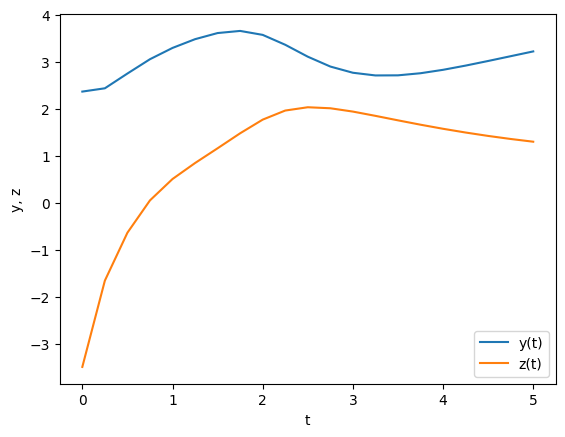

In [ ]:
t = np.arange(0, 5.1, 0.25)

plt.plot(t, y_rk4_sys, label = 'y(t)')
plt.plot(t, z_rk4_sys, label = 'z(t)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y, z')
plt.show()

As well as a graph of $y(t)$ vs $z(t)$.

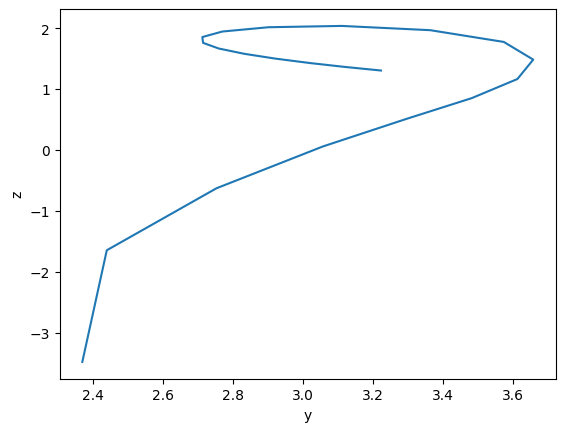

In [ ]:
plt.plot(y_rk4_sys, z_rk4_sys)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

Both graphs are similar to the graph in the exercise sheet.